In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

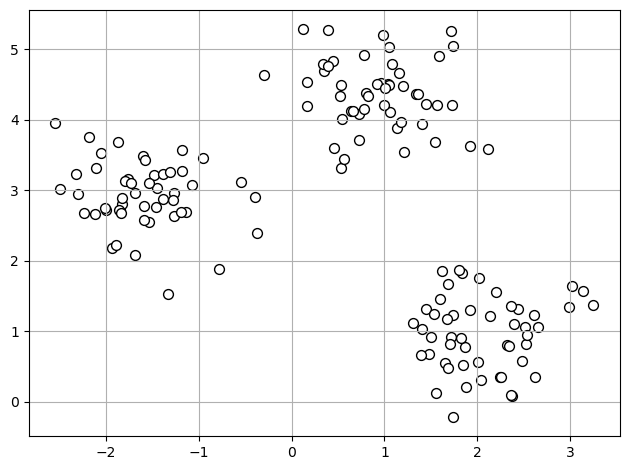

In [2]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)

plt.grid()
plt.tight_layout()
plt.show()

# K-Means Algorithm

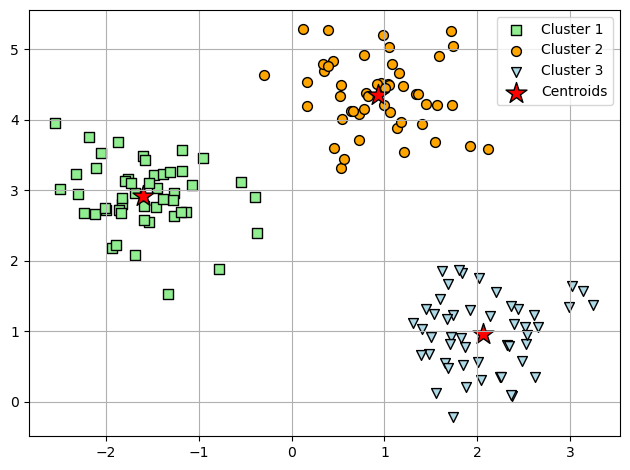

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)


plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, c='red',
            marker='*', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Notes:

- By setting n_init=10 to run the k-means clustering algorithms 10 times independently, with different random centroids to choose the final model as the one with the lowest SSE.

- K means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached.

- By setting the tol=1e-04, we control the tolerance with regard to the changes in the within-cluster SSE to declare convergence.

**Elbow Method**

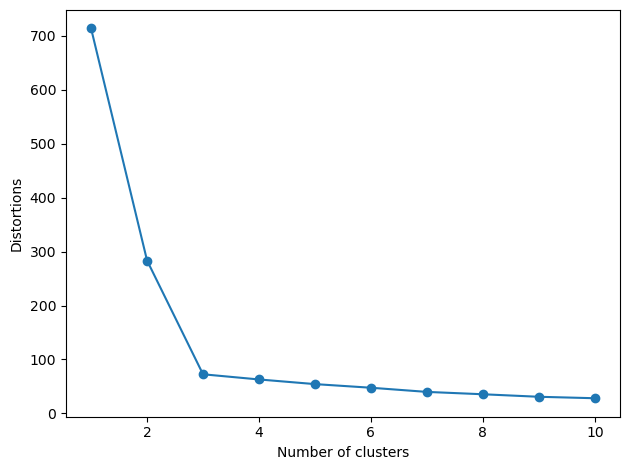

In [4]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.tight_layout()
plt.show()

**Silhouette Plots**

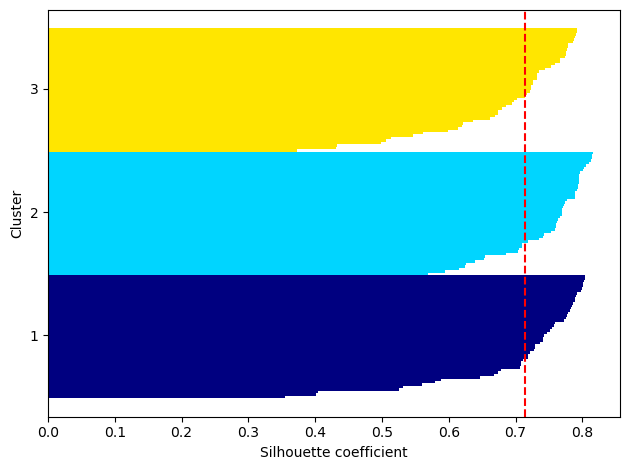

In [5]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.tight_layout()
plt.show()

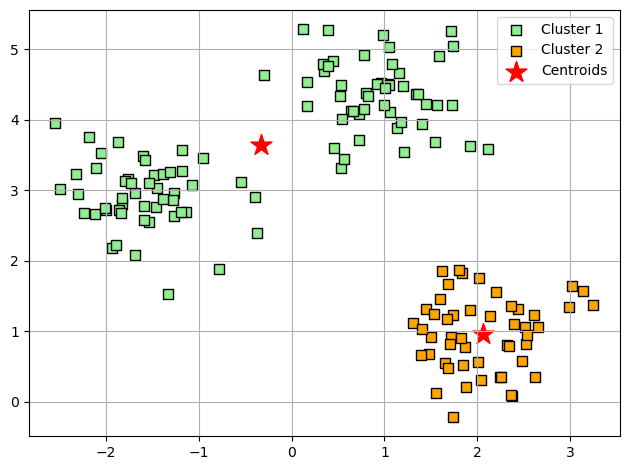

In [6]:
# Silhouette Plots Bad Model

km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            edgecolor='black',
            marker='s',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

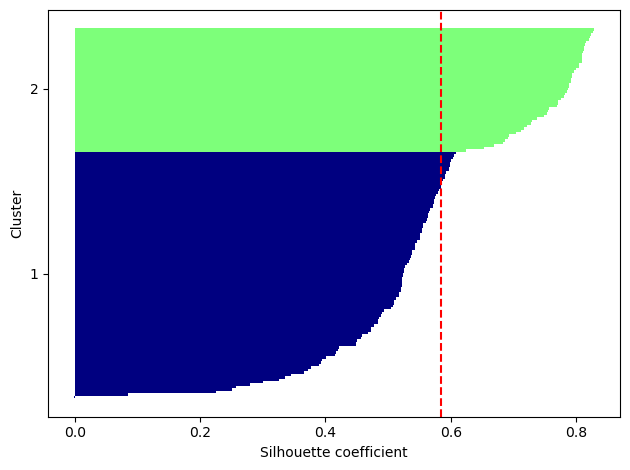

In [7]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.tight_layout()
plt.show()

# Hierarchical Tree (Single Linkage)

**Creating Hierarchical Tree and the Dendogram using Scipy**

In [22]:
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [23]:
# Create distance matrix

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns=labels, index=labels)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [24]:
from scipy.cluster.hierarchy import linkage
# print(help(linkage))

# Complete linkage agglomeration using linkage function

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# Alternative
# row_clusters = linkage(df.values,
#                        method='complete',
#                        metric='euclidean')
print("Labels: ", labels)
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=[f'cluster {i + 1}' for i in range(row_clusters.shape[0])])

Labels:  ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


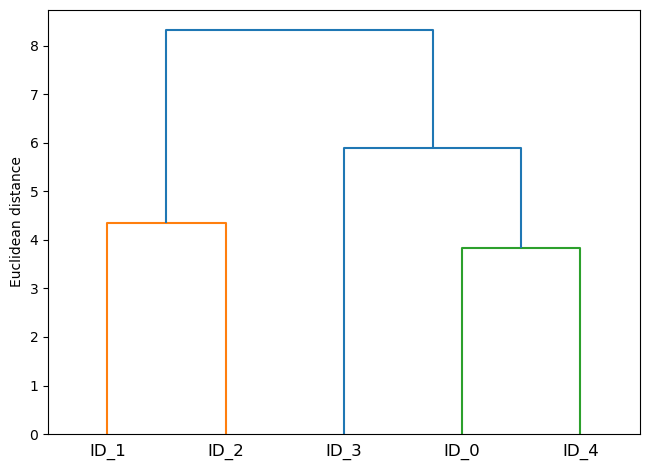

In [25]:
from scipy.cluster.hierarchy import dendrogram

# Make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # Make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Attaching Dendograms to a Heat Map**

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_16408\4225340218.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_16408\4225340218.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


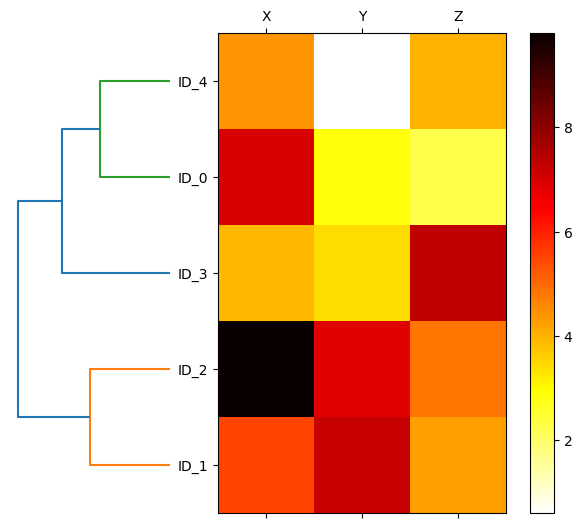

In [13]:
# Create figure object
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
                      orientation='left')
# note: for matplotlib < v1.5.1, please use orientation='right'

# Reorder the data according to the clustering labels
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# Construct heat map
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r')

# Modify aesthetics of the dendogram
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

The order of rows in the heat map reflects the clustering of the examples in the dendrogram. In addition to a simple dendrogram, the color-coded values of each example and feature in the heat map provide us with a nice summary of the dataset.

**Applying Agglomerative Clustering via Scikit-learn**

In [14]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f"Cluster labels: {labels}")

Cluster labels: [1 0 0 2 1]


In [15]:
ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f"Cluster labels: {labels}")

Cluster labels: [0 1 1 0 0]


# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

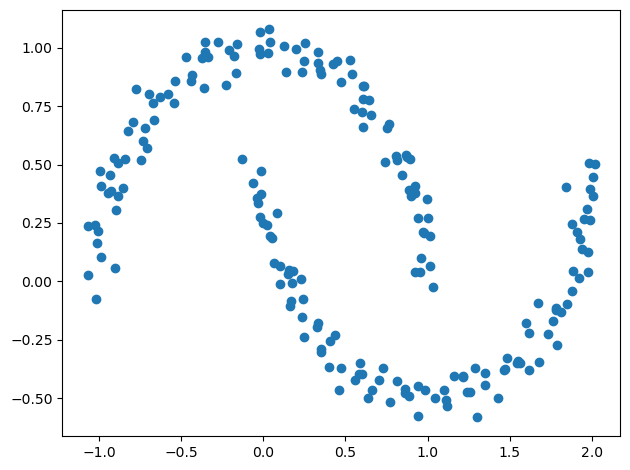

In [26]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

**Try using KMeans & Agglomerative Clustering**

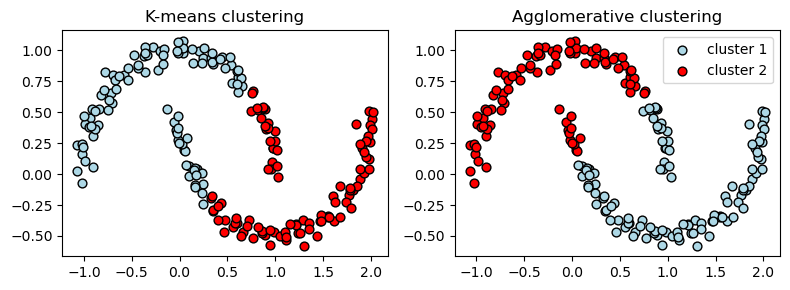

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# K-means
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            c='red',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')

# Agglomerative
ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0],
            X[y_ac==0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1, 0],
            X[y_ac==1, 1],
            c='red',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

NOTES:
- Based on the visualized clustering results, we can see that the k-means algorithm was unable to separate the two clusters, and also, the hierarchical clustering algorithm was challenged by those complex shapes.

**Using DBSCAN**

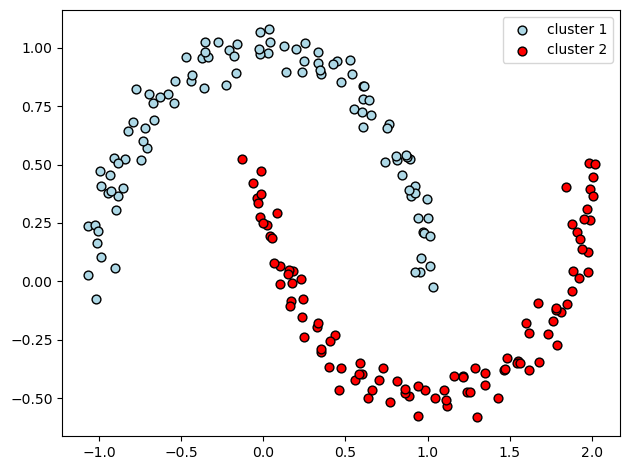

In [29]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0],
            X[y_db==0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db==1, 0],
            X[y_db==1, 1],
            c='red',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

NOTES:
- The DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the strengths of DBSCAN – clustering data of arbitrary shapes